# Import Library and Dataset

In [6]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [12]:
# load data
url = 'https://raw.githubusercontent.com/Yogaaprila/principal-component-analysis-penguin-species/main/penguins.csv'
df = pd.read_csv(url)

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [16]:
# number of rows and columns
df.shape

(344, 5)

# Summarical Statistics

In [18]:
# summary statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


# Handle Outlier

<Axes: >

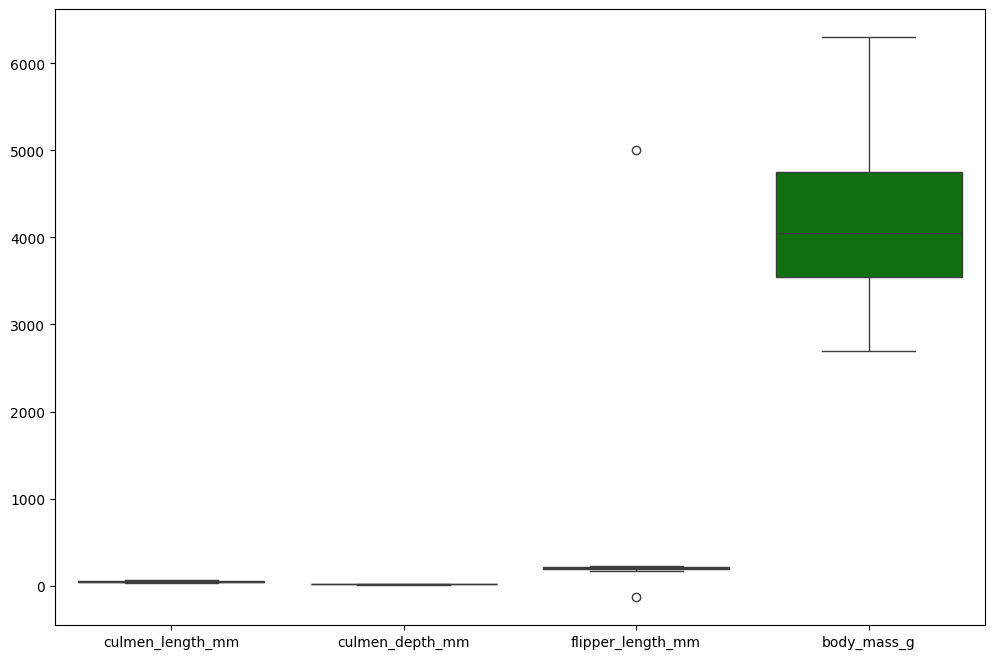

In [20]:
# create boxplot
plt.figure(figsize = (12,8))
sns.boxplot(data = df, color='green')

In [22]:
# delete outlier
df2 = df.loc[(df['flipper_length_mm'] > 0) & (df['flipper_length_mm'] < 1000)]
df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# Handle Missing and Anomalies Value

In [24]:
df2['sex'].value_counts()

sex
MALE      167
FEMALE    165
.           1
Name: count, dtype: int64

In [26]:
# drop '.' from sex column
df2 = df2[df2['sex']!='.']

In [28]:
# check missing value
df2.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [30]:
# delete missing rows
df2.dropna(axis=0,inplace=True)

In [32]:
# check missing values per columns
df2.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
# calculate percentage number of removed rows
((len(df)-len(df2))/len(df))*100

3.488372093023256

# Feature Encoding

In [36]:
# one hot encoding
df2 = pd.get_dummies(df2, columns=['sex'], prefix='sex')

# convert to integer
df2[['sex_FEMALE','sex_MALE']] = df2[['sex_FEMALE','sex_MALE']].astype(int)

df2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


# Standardization / Z-Score Normalization

In [40]:
# save df2 in new variabel as df3
df3 = df2.copy()

In [42]:
# initiate scaler
scaler = StandardScaler()

# fit scaler to dataframe df3
data_scaled = scaler.fit_transform(df3)

In [54]:
df_scaled = pd.DataFrame(data=data_scaled, columns=df2.columns) # convert to dataframe

In [58]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,332.0,-4.708416e-16,1.001509,-2.189667,-0.830434,0.124703,0.845648,2.861539
culmen_depth_mm,332.0,1.284113e-16,1.001509,-2.070694,-0.793438,0.075096,0.790360,2.220887
flipper_length_mm,332.0,7.276642e-16,1.001509,-2.067519,-0.783164,-0.283693,0.857956,2.142311
body_mass_g,332.0,4.280378e-17,1.001509,-1.871059,-0.815350,-0.225395,0.713876,2.600180
sex_FEMALE,332.0,1.391123e-16,1.001509,-0.993994,-0.993994,-0.993994,1.006042,1.006042
sex_MALE,332.0,-1.391123e-16,1.001509,-1.006042,-1.006042,0.993994,0.993994,0.993994


In [44]:
data_scaled

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
         0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235,
        -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235,
        -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394,
         0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235,
        -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394,
         0.99399394]])

# PCA

In [148]:
pca = PCA(n_components=2)  # for example, selecting 2 principal components

principal_components = pca.fit_transform(data_scaled)  # fit the data using PCA

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # convert to dataframe

In [150]:
df_pca.tail()

,PC1,PC2
327,0.649076,-2.582213
328,0.556298,-2.391971
329,3.086642,-0.412533
330,0.507364,-2.222630
331,2.486219,0.001619


In [152]:
# variance analysis
print('Explained Variance Ration: ',pca.explained_variance_ratio_)
print('Total Explained Variance: ',sum(pca.explained_variance_ratio_))

Explained Variance Ration:  [0.52034062 0.34463112]
Total Explained Variance:  0.8649717341499124


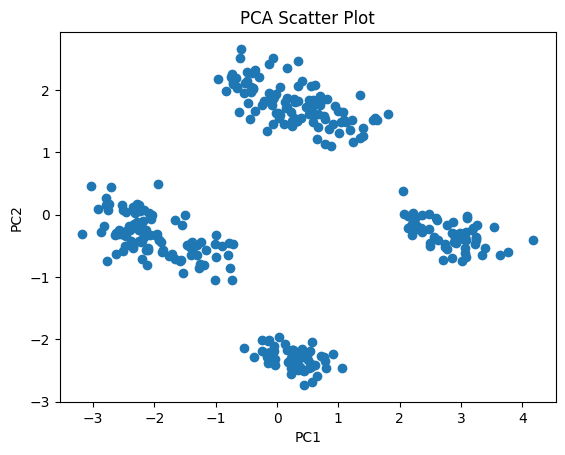

In [154]:
# visualisasi scatter plot
plt.scatter(df_pca['PC1'],df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

# K-Means

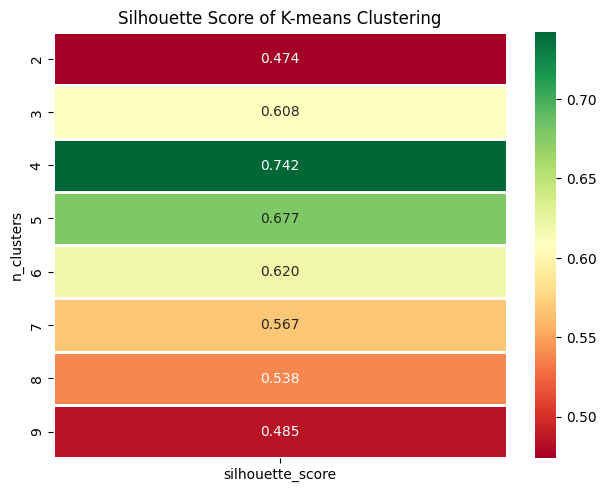

In [156]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, init='k-means++',random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()
    
# print chart
visualize_silhouette_layer(principal_components)

In [158]:
# fit model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(principal_components)

df_pca['Cluster'] = kmeans.labels_ # add cluster columns to df_pca
df2['Cluster'] = kmeans.labels_ # add cluster columns to df2

In [160]:
df_pca.head()

,PC1,PC2,Cluster
0,-0.718046,2.097125,0
1,-1.927063,-0.408160,2
2,-1.950544,-0.304877,2
3,-2.283148,0.163127,2
4,-0.608572,2.512826,0


In [162]:
df2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,Cluster
0,39.1,18.7,181.0,3750.0,0,1,0
1,39.5,17.4,186.0,3800.0,1,0,2
2,40.3,18.0,195.0,3250.0,1,0,2
4,36.7,19.3,193.0,3450.0,1,0,2
5,39.3,20.6,190.0,3650.0,0,1,0


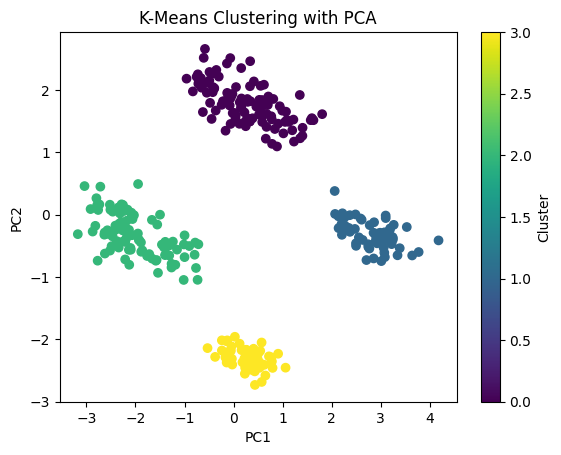

In [164]:
# visualisasi scatterplot 
plt.scatter(df_pca['PC1'],df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()